# Project 1, Part 1, Executive Questions: Sales Specific Questions

University of California, Berkeley
Master of Information and Data Science (MIDS) program
w205 - Fundamentals of Data Engineering

Student: Stephanie Cabanela

Year: 2022

Semester: Spring

Section: 7


# Included Modules and Packages

Code cell containing your includes for modules and packages

In [1]:
import math
import numpy as np
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  Remember you can use any code from the labs.

In [2]:
# Source for this cell: Lab 2

#
# function to run a select query and return rows in a pandas dataframe
# pandas puts all numeric values from postgres to float
# if it will fit in an integer, change it to integer
#

def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)

# Connect to Postgres database
connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)

# Create a cursor for the connection
cursor = connection.cursor()

# Instructions for Specific Questions

For each specific quesion, you must write 1 and only 1 query that answers that specific question.  The results of your query must be displayed in a Pandas dataframe as demonstrated in the labs

All output should be sorted.

For store name, use the city name the store is located in.

When sorting by store name, sort in alphabetical order.

For month, use the full month name: January, February, March, etc.

When sorting by month, sort in calendar order: January, February, March, etc.  You may find it useful to include a month number to help with the sort.  It's ok to leave it in the output.

For day of week, use the full day of week name: Sunday, Monday, Tuesday, etc.

When sorting by day of week, sort in day of week order: Sunday, Monday, Tuesday, etc. You may find it usefule to include a day of week number to help with the sort.  It's ok to leave it in the output.


# 1.1.1 Total Sales as a Dollar Amount for all of AGM

In [3]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select sum(total_amount) as total_sales_dollars
from sales

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_sales_dollars
0,98739408


# 1.1.2 Total Sales as a Dollar Amount by Store

Sort by store name in alphabetical order

In [4]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select stores.city  as store_name, sum(sales.total_amount) as total_sales_dollars
from stores
    join sales on stores.store_id = sales.store_id
group by store_name
order by store_name

"""

total_sales_by_store = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
total_sales_by_store

,store_name,total_sales_dollars
0,Berkeley,25041060
1,Dallas,19408260
2,Miami,17692404
3,Nashville,14573172
4,Seattle,22024512


# 1.1.3 Total Sales as a Dollar Amount by Month

Sort by month full name in calendar order

In [5]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select extract(month from sale_date) as month_number,
        to_char(sale_date, 'Month') as month_name,
        sum(total_amount) as total_sales_dollars
from sales
group by month_number, month_name
order by month_number

"""


my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,month_number,month_name,total_sales_dollars
0,1,January,7803828
1,2,February,7574280
2,3,March,8779620
3,4,April,8251284
4,5,May,7977840
5,6,June,8124108
6,7,July,7993044
7,8,August,9029808
8,9,September,7578960
9,10,October,8895108


# 1.1.4 Total Sales as a Dollar Amount by Store and Month

Sort by store name in alphabetical order, then by month full name in calendar order

In [6]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select st.city as store_name,
        extract(month from sa.sale_date) as month_number,
        to_char(sa.sale_date, 'Month') as month_name,
        sum(sa.total_amount) as total_sales_dollars
from stores as st
    join sales as sa on st.store_id = sa.store_id
group by store_name, month_number, month_name
order by store_name, month_number

"""


my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store_name,month_number,month_name,total_sales_dollars
0,Berkeley,1,January,1988904
1,Berkeley,2,February,1930272
2,Berkeley,3,March,2224500
3,Berkeley,4,April,2092056
4,Berkeley,5,May,2019264
5,Berkeley,6,June,2065140
6,Berkeley,7,July,2034708
7,Berkeley,8,August,2286732
8,Berkeley,9,September,1922256
9,Berkeley,10,October,2248008


# 1.1.5 Total Sales as a Dollar Amount by Day of Week

Sort by day of week in day of week order.

In [7]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select extract(dow from sale_date) as day_number,
        to_char(sale_date, 'Day') as day_name,
        sum(total_amount) as total_sales_dollars
from sales
group by day_number, day_name
order by day_number

"""


my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,day_number,day_name,total_sales_dollars
0,0,Sunday,18589068
1,1,Monday,13167720
2,2,Tuesday,6895332
3,3,Wednesday,13952556
4,4,Thursday,13834644
5,5,Friday,12878628
6,6,Saturday,19421460


# 1.1.6 Total Sales as a Dollar Amount by Store and Day of Week

Sort by store name in alphabetical order, then by day of week in day of week order.

In [8]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select st.city as store_name,
        extract(dow from sa.sale_date) as day_number,
        to_char(sa.sale_date, 'Day') as day_name,
        sum(sa.total_amount) as total_sales_dollars
from stores as st
    join sales as sa on st.store_id = sa.store_id
group by store_name, day_number, day_name
order by store_name, day_number

"""


my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store_name,day_number,day_name,total_sales_dollars
0,Berkeley,0,Sunday,4694640
1,Berkeley,1,Monday,3340116
2,Berkeley,2,Tuesday,1752036
3,Berkeley,3,Wednesday,3546144
4,Berkeley,4,Thursday,3507660
5,Berkeley,5,Friday,3273240
6,Berkeley,6,Saturday,4927224
7,Dallas,0,Sunday,3650748
8,Dallas,1,Monday,2602980
9,Dallas,2,Tuesday,1352760


# 1.1.7 Total Number of Sales for all of AGM

In [9]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select count(*) as total_number_sales
from sales

"""


my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_number_sales
0,1537617


# 1.1.8 Total Number of Sales by Store

Sort by store name in alphabetical order

In [10]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select st.city as store_name, sa.total_number_sales
from (select store_id, count(sale_id) as total_number_sales
        from sales
        group by store_id) as sa
    join stores as st on st.store_id = sa.store_id
order by store_name

"""


my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store_name,total_number_sales
0,Berkeley,390375
1,Dallas,302120
2,Miami,275074
3,Nashville,227721
4,Seattle,342327


# 1.1.9 Average Dollar Amount per Sale 

In [11]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select avg(total_amount) as avg_dollar_amount
from sales

"""


my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,avg_dollar_amount
0,64.215866


# 1.1.10 Average Dollar Amount per Sale by Store

Sort by store name in alphabetical order

In [12]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select st.city as store_name, sa.avg_dollar_amount
from (select store_id, avg(total_amount) as avg_dollar_amount
        from sales
        group by store_id) as sa
    join stores as st on st.store_id = sa.store_id
order by store_name

"""


my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store_name,avg_dollar_amount
0,Berkeley,64.146167
1,Dallas,64.240236
2,Miami,64.318707
3,Nashville,63.995732
4,Seattle,64.337642


# 1.1.11 The Executives have also asked you to provide your best example of a data visualization for one of the above queries

You may choose any one of the above queries. 

It's best to select the one that you think will provide the most interesting data visualization.  

You are allowed to add a pivot as demonstrated in the labs if it is needed for your data visualization. 

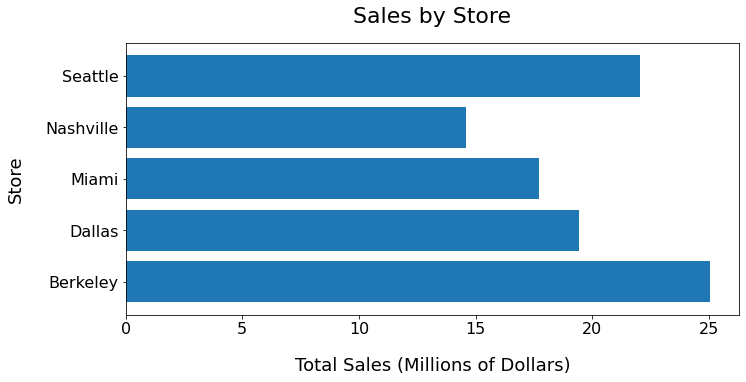

In [13]:
# Taken from query for 1.1.2: Total Sales as a Dollar Amount by Store
# We can visually see which store is doing better in terms of sales.
# We can use this graph as a starting point to investigate why some stores are doing better than others.

store_sales = total_sales_by_store.reindex(index=total_sales_by_store.index[::1])
store_sales['total_sales_dollars'] = store_sales['total_sales_dollars']/1000000
plt.figure(figsize=(11,5))
plt.rcParams.update({'font.size':16})
plt.barh(store_sales['store_name'], store_sales['total_sales_dollars'])
plt.title('Sales by Store', fontsize=22, pad=20)
plt.xlabel('Total Sales (Millions of Dollars)', fontsize=18, labelpad=20)
plt.ylabel('Store', fontsize=18, labelpad=20)
plt.show()